In [31]:

# import dask.dataframe as dd
# # Define the data types for each column
# dtype = {
#     'County Name': 'object',
#     'Number of Trips': 'float64',
#     'Number of Trips 1-3': 'float64',
#     'Number of Trips 10-25': 'float64',
#     'Number of Trips 100-250': 'float64',
#     'Number of Trips 25-50': 'float64',
#     'Number of Trips 250-500': 'float64',
#     'Number of Trips 3-5': 'float64',
#     'Number of Trips 5-10': 'float64',
#     'Number of Trips 50-100': 'float64',
#     'Number of Trips <1': 'float64',
#     'Number of Trips >=500': 'float64',
#     'Population Not Staying at Home': 'float64',
#     'Population Staying at Home': 'float64',
#     'State Postal Code': 'object'
# }

# Load the data from 'trips_by_distance.csv' into a Dask DataFrame
# ddd = dd.read_csv('trips_by_distance.csv')

# # Fill null values
# ddd['Population Staying at Home'] = ddd['Population Staying at Home'].fillna(0)
# # Convert floats to ints so that the mean() works
# ddd['Population Staying at Home'] = ddd['Population Staying at Home'].round().astype('int64')
# # Group by 'Week' and calculate the average of 'Population Staying at Home' for each week
# average_per_week = ddd.groupby('Week')['Population Staying at Home'].mean()
# avperweek = average_per_week.compute()
# # Convert the avperweek to integer otherwise it gives it to you in standard form
# avperweek_int = avperweek.astype('int64')
# print("Average number of people staying at home per week", avperweek_int)


In [44]:
import dask.dataframe as dd

# Read the dataset
df = dd.read_csv('trips_full_data.csv')

# Calculate the average distance traveled for each type of trip
avg_distance_1_25 = df['Trips 1-25 Miles'].mean()
avg_distance_25_50 = df['Trips 25-50 Miles'].mean()
avg_distance_50_100 = df['Trips 50-100 Miles'].mean()
avg_distance_100_250 = df['Trips 100-250 Miles'].mean()
avg_distance_250_500 = df['Trips 250-500 Miles'].mean()
avg_distance_500_plus = df['Trips 500+ Miles'].mean()

# Calculate the total number of people not staying at home per week
total_people_not_staying_home = df['People Not Staying at Home'].sum()

# Calculate the average number of people not staying at home per week
avg_people_not_staying_home = total_people_not_staying_home.compute() // len(df['Week of Date'].unique())

# Compute the mean values and convert them to integers
avg_distance_1_25_int = int(avg_distance_1_25.compute())
avg_distance_25_50_int = int(avg_distance_25_50.compute())
avg_distance_50_100_int = int(avg_distance_50_100.compute())
avg_distance_100_250_int = int(avg_distance_100_250.compute())
avg_distance_250_500_int = int(avg_distance_250_500.compute())
avg_distance_500_plus_int = int(avg_distance_500_plus.compute())

print("Average distance traveled for trips 1-25 miles:", avg_distance_1_25_int)
print("Average distance traveled for trips 25-50 miles:", avg_distance_25_50_int)
print("Average distance traveled for trips 50-100 miles:", avg_distance_50_100_int)
print("Average distance traveled for trips 100-250 miles:", avg_distance_100_250_int)
print("Average distance traveled for trips 250-500 miles:", avg_distance_250_500_int)
print("Average distance traveled for trips 500+ miles:", avg_distance_500_plus_int)
print("Total number of people not staying at home:", total_people_not_staying_home.compute())
print("Average number of people not staying at home per week:", avg_people_not_staying_home)


Average distance traveled for trips 1-25 miles: 1015555465
Average distance traveled for trips 25-50 miles: 69159131
Average distance traveled for trips 50-100 miles: 18878323
Average distance traveled for trips 100-250 miles: 6850130
Average distance traveled for trips 250-500 miles: 1829242
Average distance traveled for trips 500+ miles: 3443101
Total number of people not staying at home: 1841728352
Average number of people not staying at home per week: 1841728352


In [45]:
import dask.dataframe as dd

# Read the dataset
df = dd.read_csv('trips_full_data.csv')

# Calculate the total number of people not staying at home per week
total_people_not_staying_home = df['People Not Staying at Home'].sum()

# Calculate the total distance traveled for each type of trip
total_distance_1_25 = (df['Trips 1-25 Miles'] * df['People Not Staying at Home']).sum()
total_distance_25_50 = (df['Trips 25-50 Miles'] * df['People Not Staying at Home']).sum()
total_distance_50_100 = (df['Trips 50-100 Miles'] * df['People Not Staying at Home']).sum()
total_distance_100_250 = (df['Trips 100-250 Miles'] * df['People Not Staying at Home']).sum()
total_distance_250_500 = (df['Trips 250-500 Miles'] * df['People Not Staying at Home']).sum()
total_distance_500_plus = (df['Trips 500+ Miles'] * df['People Not Staying at Home']).sum()

# Calculate the weighted average distance traveled
weighted_avg_distance = (total_distance_1_25 + total_distance_25_50 + total_distance_50_100 +
                         total_distance_100_250 + total_distance_250_500 + total_distance_500_plus) / total_people_not_staying_home

# Convert the result to integer
weighted_avg_distance_int = int(weighted_avg_distance.compute())

print("Average distance traveled by people not staying at home per week:", weighted_avg_distance_int)
print("Total number of people not staying at home:", total_people_not_staying_home.compute())


Average distance traveled by people not staying at home per week: 1116090845
Total number of people not staying at home: 1841728352


C:\Users\shoai\AppData\Local\Temp\ipykernel_11344\1573514783.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Distance Range (Miles)', y='Total Distance Traveled', data=plot_data, palette='viridis')


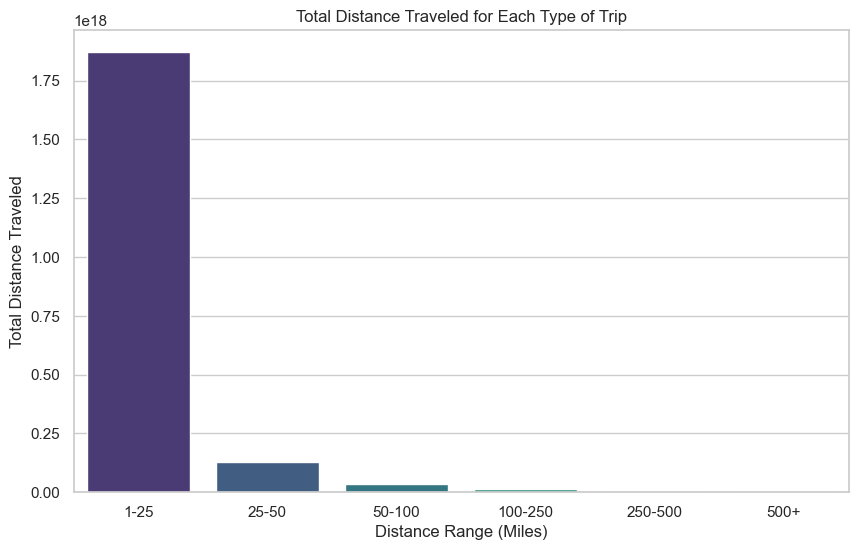

Average distance traveled by people not staying at home per week: 1116090845.2426665
Total number of people not staying at home: 1841728352


In [66]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = dd.read_csv('trips_full_data.csv')

# Calculate the total number of people not staying at home per week
total_people_not_staying_home = df['People Not Staying at Home'].sum().compute()

# Calculate the total distance traveled for each type of trip
total_distance_1_25 = (df['Trips 1-25 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_25_50 = (df['Trips 25-50 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_50_100 = (df['Trips 50-100 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_100_250 = (df['Trips 100-250 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_250_500 = (df['Trips 250-500 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_500_plus = (df['Trips 500+ Miles'] * df['People Not Staying at Home']).sum().compute()

# Create a DataFrame for plotting
data = {
    'Distance Range (Miles)': ['1-25', '25-50', '50-100', '100-250', '250-500', '500+'],
    'Total Distance Traveled': [total_distance_1_25, total_distance_25_50, total_distance_50_100,
                                 total_distance_100_250, total_distance_250_500, total_distance_500_plus]
}
plot_data = pd.DataFrame(data)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Distance Range (Miles)', y='Total Distance Traveled', data=plot_data, palette='viridis')
plt.title('Total Distance Traveled for Each Type of Trip')
plt.xlabel('Distance Range (Miles)')
plt.ylabel('Total Distance Traveled')
plt.show()

# Calculate the weighted average distance traveled
weighted_avg_distance = sum([total_distance_1_25, total_distance_25_50, total_distance_50_100,
                             total_distance_100_250, total_distance_250_500, total_distance_500_plus]) / total_people_not_staying_home

print("Average distance traveled by people not staying at home per week:", weighted_avg_distance)
print("Total number of people not staying at home:", total_people_not_staying_home)


In [64]:
import dask.dataframe as dd

# Read the dataset
df = dd.read_csv('trips_full_data.csv')

# Calculate the average distance traveled for each type of trip
avg_distance_1_25 = int(df['Trips 1-25 Miles'].mean().compute())
avg_distance_1_3 = int(df['Trips 1-3 Miles'].mean().compute())
avg_distance_10_25 = int(df['Trips 10-25 Miles'].mean().compute())
avg_distance_100_250 = int(df['Trips 100-250 Miles'].mean().compute())
avg_distance_100_plus = int(df['Trips 100+ Miles'].mean().compute())
avg_distance_25_100 = int(df['Trips 25-100 Miles'].mean().compute())
avg_distance_25_50 = int(df['Trips 25-50 Miles'].mean().compute())
avg_distance_250_500 = int(df['Trips 250-500 Miles'].mean().compute())
avg_distance_3_5 = int(df['Trips 3-5 Miles'].mean().compute())
avg_distance_5_10 = int(df['Trips 5-10 Miles'].mean().compute())
avg_distance_50_100 = int(df['Trips 50-100 Miles'].mean().compute())
avg_distance_500_plus = int(df['Trips 500+ Miles'].mean().compute())

# Print the average distance traveled for each type of trip
print("Average distance traveled for trips 1-25 miles:", avg_distance_1_25)
print("Average distance traveled for trips 1-3 miles:", avg_distance_1_3)
print("Average distance traveled for trips 10-25 miles:", avg_distance_10_25)
print("Average distance traveled for trips 100-250 miles:", avg_distance_100_250)
print("Average distance traveled for trips 100+ miles:", avg_distance_100_plus)
print("Average distance traveled for trips 25-100 miles:", avg_distance_25_100)
print("Average distance traveled for trips 25-50 miles:", avg_distance_25_50)
print("Average distance traveled for trips 250-500 miles:", avg_distance_250_500)
print("Average distance traveled for trips 3-5 miles:", avg_distance_3_5)
print("Average distance traveled for trips 5-10 miles:", avg_distance_5_10)
print("Average distance traveled for trips 50-100 miles:", avg_distance_50_100)
print("Average distance traveled for trips 500+ miles:", avg_distance_500_plus)


Average distance traveled for trips 1-25 miles: 1015555465
Average distance traveled for trips 1-3 miles: 369476656
Average distance traveled for trips 10-25 miles: 231078511
Average distance traveled for trips 100-250 miles: 6850130
Average distance traveled for trips 100+ miles: 12122473
Average distance traveled for trips 25-100 miles: 88037454
Average distance traveled for trips 25-50 miles: 69159131
Average distance traveled for trips 250-500 miles: 1829242
Average distance traveled for trips 3-5 miles: 181555833
Average distance traveled for trips 5-10 miles: 233444464
Average distance traveled for trips 50-100 miles: 18878323
Average distance traveled for trips 500+ miles: 3443101


C:\Users\shoai\AppData\Local\Temp\ipykernel_11344\2657093417.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=average_distances, palette='viridis')


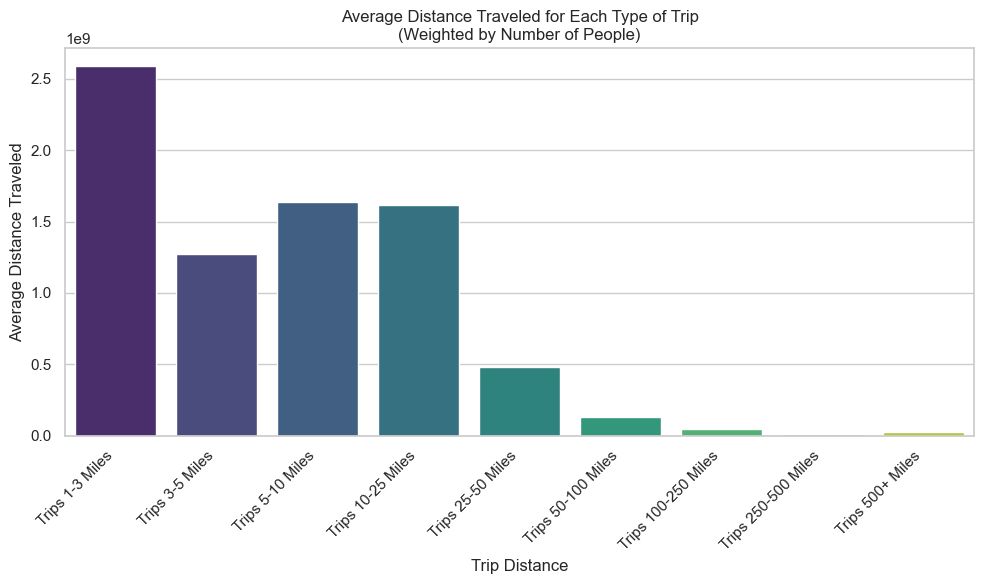

In [62]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = dd.read_csv('trips_full_data.csv')

# Calculate the average number of people not staying at home per week
average_people_not_staying_home = df['People Not Staying at Home'].mean().compute()

# Define trip distance categories
trip_distance_categories = ['Trips 1-3 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
                            'Trips 10-25 Miles', 'Trips 25-50 Miles', 'Trips 50-100 Miles',
                            'Trips 100-250 Miles', 'Trips 250-500 Miles', 'Trips 500+ Miles']

# Initialize list to store total distances
total_distances = []

# Calculate the total distance traveled for each type of trip weighted by the number of people not staying at home
for category in trip_distance_categories:
    total_distance = (df[category] * df['People Not Staying at Home']).sum().compute() / average_people_not_staying_home
    total_distances.append(total_distance)

# Data for the bar plot
categories = trip_distance_categories
average_distances = total_distances





# Create bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=average_distances, palette='viridis')
plt.title('Average Distance Traveled for Each Type of Trip\n(Weighted by Number of People)')
plt.xlabel('Trip Distance')
plt.ylabel('Average Distance Traveled')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\shoai\AppData\Local\Temp\ipykernel_11344\4206271510.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Distance Range (Miles)', y='Total Distance Traveled', data=plot_data, palette='viridis')


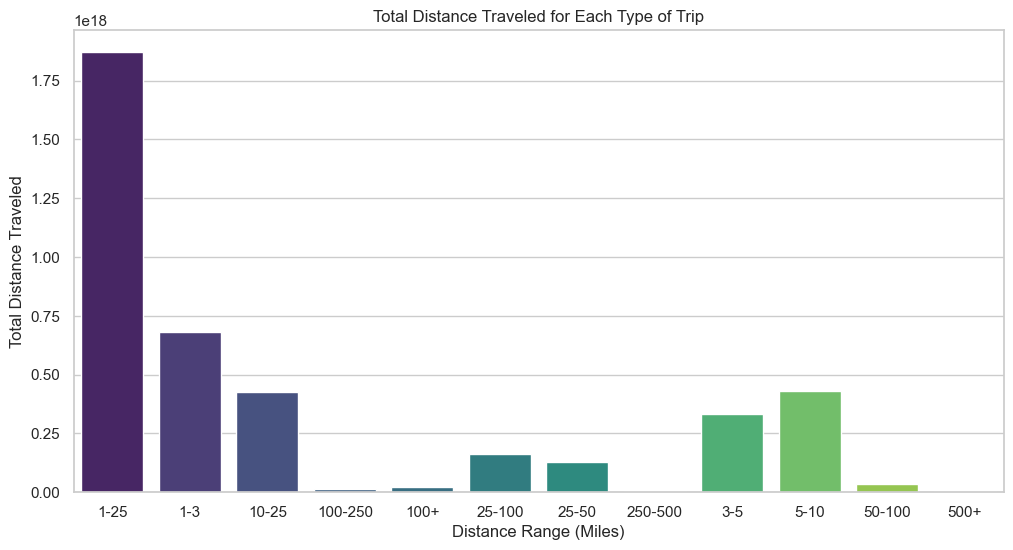

Average distance traveled by people not staying at home per week: 2232181690.485333
Total number of people not staying at home: 1841728352


In [67]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = dd.read_csv('trips_full_data.csv')

# Calculate the total number of people not staying at home per week
total_people_not_staying_home = df['People Not Staying at Home'].sum().compute()

# Calculate the total distance traveled for each type of trip
total_distance_1_25 = (df['Trips 1-25 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_1_3 = (df['Trips 1-3 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_10_25 = (df['Trips 10-25 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_100_250 = (df['Trips 100-250 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_100_plus = (df['Trips 100+ Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_25_100 = (df['Trips 25-100 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_25_50 = (df['Trips 25-50 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_250_500 = (df['Trips 250-500 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_3_5 = (df['Trips 3-5 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_5_10 = (df['Trips 5-10 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_50_100 = (df['Trips 50-100 Miles'] * df['People Not Staying at Home']).sum().compute()
total_distance_500_plus = (df['Trips 500+ Miles'] * df['People Not Staying at Home']).sum().compute()

# Create a DataFrame for plotting
data = {
    'Distance Range (Miles)': ['1-25', '1-3', '10-25', '100-250', '100+', '25-100', '25-50', '250-500', '3-5', '5-10', '50-100', '500+'],
    'Total Distance Traveled': [total_distance_1_25, total_distance_1_3, total_distance_10_25,
                                 total_distance_100_250, total_distance_100_plus, total_distance_25_100,
                                 total_distance_25_50, total_distance_250_500, total_distance_3_5,
                                 total_distance_5_10, total_distance_50_100, total_distance_500_plus]
}
plot_data = pd.DataFrame(data)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Distance Range (Miles)', y='Total Distance Traveled', data=plot_data, palette='viridis')
plt.title('Total Distance Traveled for Each Type of Trip')
plt.xlabel('Distance Range (Miles)')
plt.ylabel('Total Distance Traveled')
plt.show()

# Calculate the weighted average distance traveled
total_distance_all = sum([total_distance_1_25, total_distance_1_3, total_distance_10_25,
                          total_distance_100_250, total_distance_100_plus, total_distance_25_100,
                          total_distance_25_50, total_distance_250_500, total_distance_3_5,
                          total_distance_5_10, total_distance_50_100, total_distance_500_plus])

weighted_avg_distance = total_distance_all / total_people_not_staying_home

print("Average distance traveled by people not staying at home per week:", weighted_avg_distance)
print("Total number of people not staying at home:", total_people_not_staying_home)


C:\Users\shoai\AppData\Local\Temp\ipykernel_26316\3326038214.py:1: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use a new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be reported on the Dask issue tracker
https://github.com/dask/dask/issues 

To disable this warning in the future, set dask config:

    # via Python
    >>> dask.config.set({'dataframe.query-planning-warning': False})

    # via CLI
    dask c

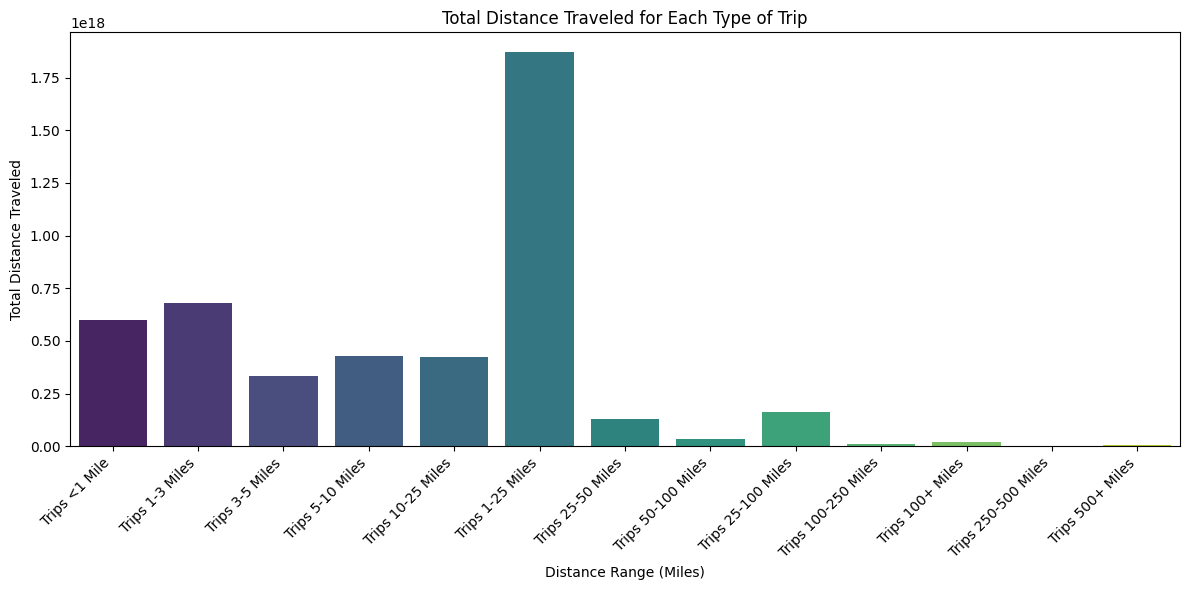

Average distance traveled by people not staying at home per week: 2558310599.5139437
Total number of people not staying at home: 1841728352


In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = dd.read_csv('trips_full_data.csv')

# Define the order of distance ranges
distance_ranges = [
    'Trips <1 Mile','Trips 1-3 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 10-25 Miles',
    'Trips 1-25 Miles', 'Trips 25-50 Miles', 'Trips 50-100 Miles', 'Trips 25-100 Miles',
    'Trips 100-250 Miles', 'Trips 100+ Miles', 'Trips 250-500 Miles', 'Trips 500+ Miles'
]






# Calculate the total number of people not staying at home per week
total_people_not_staying_home = df['People Not Staying at Home'].sum().compute()

# Calculate the total distance traveled for each type of trip
total_distances = {}

for distance_range in distance_ranges:
    total_distance = (df[distance_range] * df['People Not Staying at Home']).sum().compute()
    total_distances[distance_range] = total_distance

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Distance Range (Miles)': distance_ranges,
    'Total Distance Traveled': [total_distances[distance_range] for distance_range in distance_ranges]
})

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Distance Range (Miles)', y='Total Distance Traveled', data=plot_data, palette='viridis')
plt.title('Total Distance Traveled for Each Type of Trip')
plt.xlabel('Distance Range (Miles)')
plt.ylabel('Total Distance Traveled')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Calculate the weighted average distance traveled
total_distance_all = sum(total_distances.values())
weighted_avg_distance = total_distance_all / total_people_not_staying_home

print("Average distance traveled by people not staying at home per week:", weighted_avg_distance)
print("Total number of people not staying at home:", total_people_not_staying_home)


C:\Users\shoai\AppData\Local\Temp\ipykernel_26316\3332269972.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Distance Range (Miles)', y='Total Distance Traveled', data=plot_data, palette='viridis')


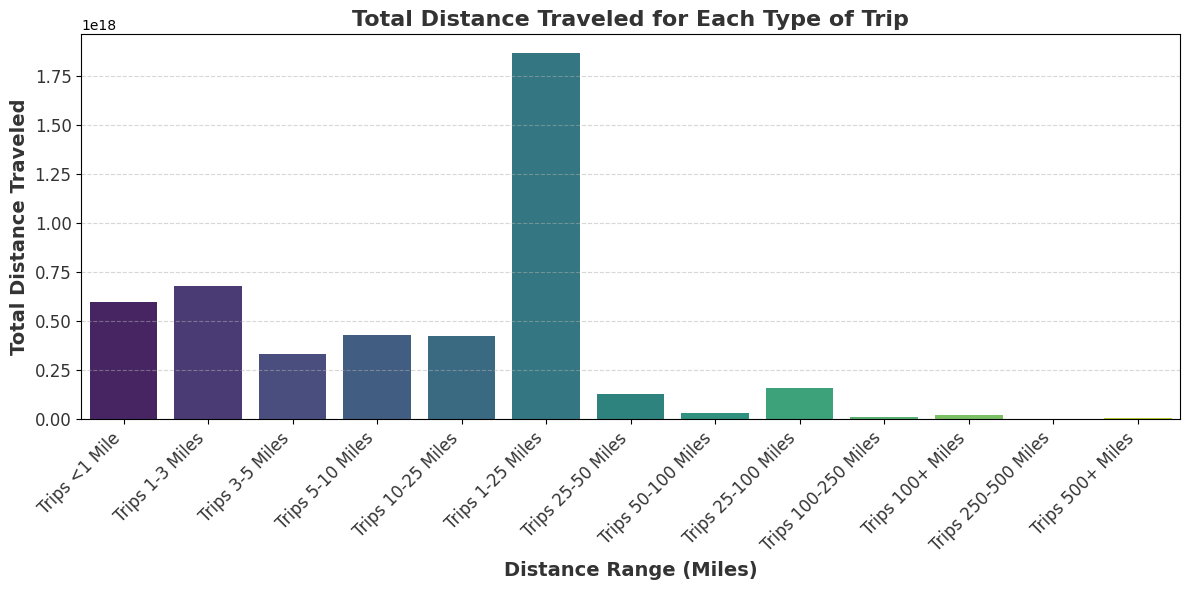

Average distance traveled by people not staying at home per week: 2558310599.5139437
Total number of people not staying at home: 1841728352


In [2]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = dd.read_csv('trips_full_data.csv')

# Define the order of distance ranges
distance_ranges = [
    'Trips <1 Mile', 'Trips 1-3 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 10-25 Miles',
    'Trips 1-25 Miles', 'Trips 25-50 Miles', 'Trips 50-100 Miles', 'Trips 25-100 Miles',
    'Trips 100-250 Miles', 'Trips 100+ Miles', 'Trips 250-500 Miles', 'Trips 500+ Miles'
]

# Calculate the total number of people not staying at home per week
total_people_not_staying_home = df['People Not Staying at Home'].sum().compute()

# Calculate the total distance traveled for each type of trip
total_distances = {}

for distance_range in distance_ranges:
    total_distance = (df[distance_range] * df['People Not Staying at Home']).sum().compute()
    total_distances[distance_range] = total_distance

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Distance Range (Miles)': distance_ranges,
    'Total Distance Traveled': [total_distances[distance_range] for distance_range in distance_ranges]
})

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Distance Range (Miles)', y='Total Distance Traveled', data=plot_data, palette='viridis')
plt.title('Total Distance Traveled for Each Type of Trip', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Distance Range (Miles)', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Total Distance Traveled', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#333333')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

# Calculate the weighted average distance traveled
total_distance_all = sum(total_distances.values())
weighted_avg_distance = total_distance_all / total_people_not_staying_home

print("Average distance traveled by people not staying at home per week:", weighted_avg_distance)
print("Total number of people not staying at home:", total_people_not_staying_home)
